In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

# Load channel 1 feature data
feature_csv_path = "channel_1_features.csv"
features = pd.read_csv(feature_csv_path, header=0)

print(f"Data shape: {features.shape}")
print(f"Columns name: {list(features.columns)}")


Data shape: (78719, 10)
Columns name: ['Mean', 'Std', 'Max', 'Min', 'Kurtosis', 'Skewness', 'RMS', 'AmplitudeRange', 'PeakFactor', 'ZeroCrossings']


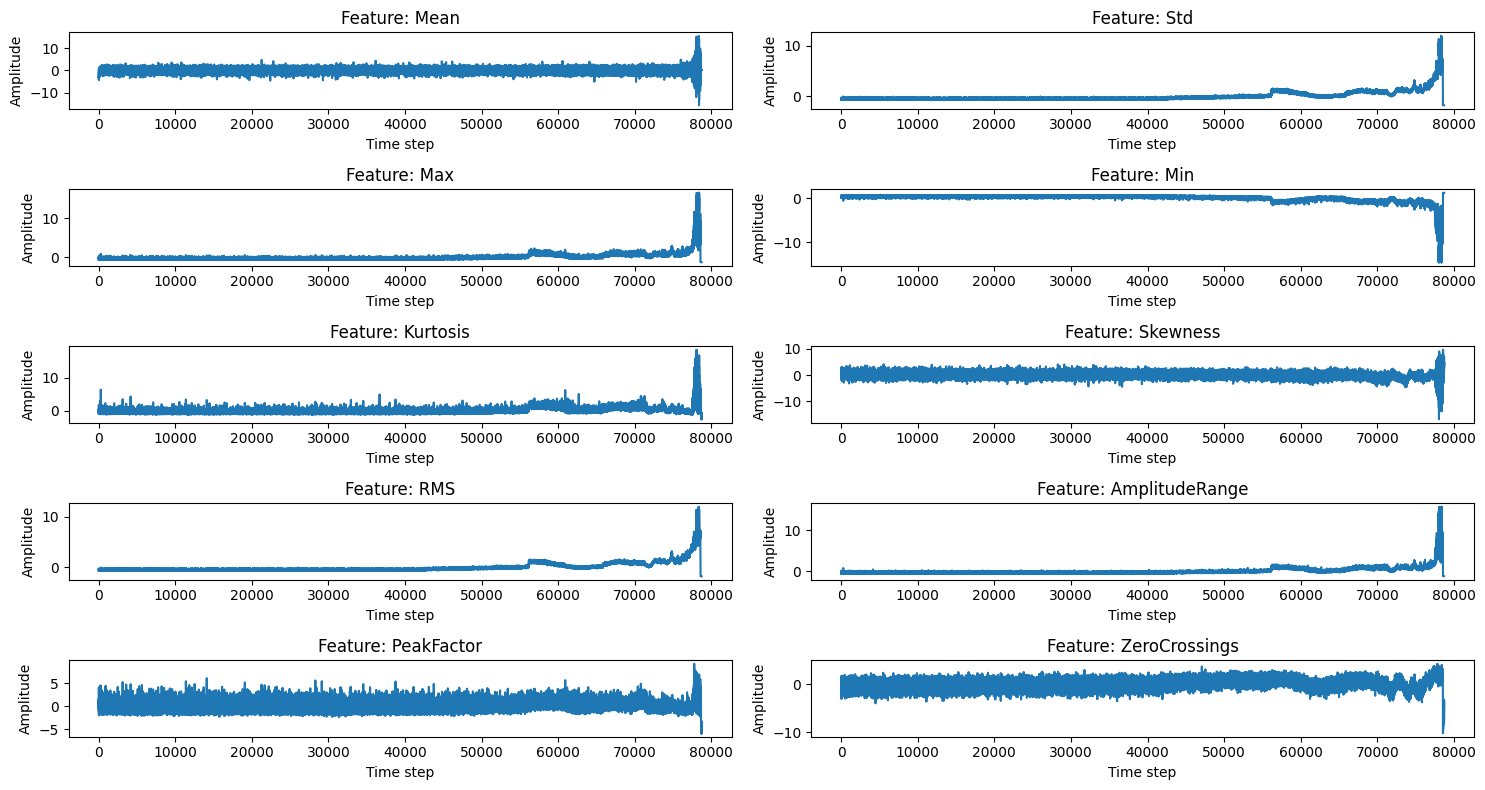

In [2]:
# plot features as time series
plt.figure(figsize=(15, 8))
for i, col in enumerate(features.columns[:10]):
    plt.subplot(5, 2, i + 1)
    plt.plot(features[col])
    plt.title(f"Feature: {col}")
    plt.xlabel("Time step")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

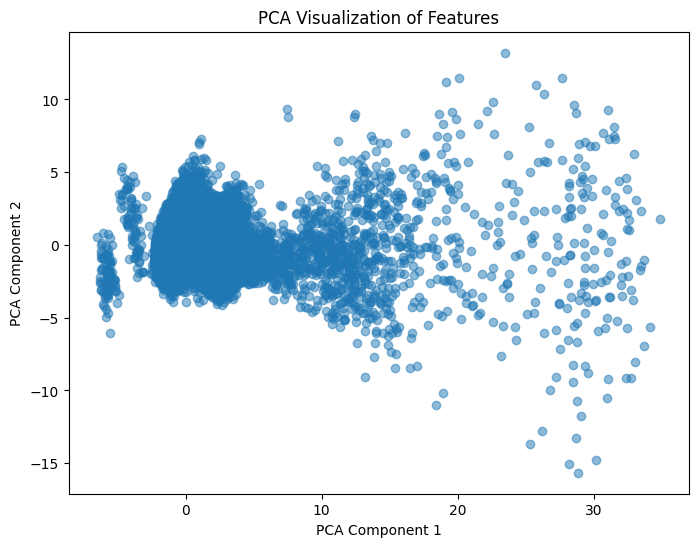

In [3]:
# plot features in 2D with principal component analysis transformed feature space
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features)

plt.figure(figsize=(8, 6))
plt.scatter(features_2d[:, 0], features_2d[:, 1], alpha=0.5)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization of Features")
plt.show()

In [4]:
# Use Isolation Forest to generate labels, assuming a contamination level of 0.01
contamination = 0.01  
model = IsolationForest(contamination=contamination, random_state=42)

In [5]:
# training
predictions = model.fit_predict(features)  
anomaly_scores = model.decision_function(features) 

In [6]:
# convert predictions to labels, 0 is normal, 1 indicates anomaly. 
binary_labels = np.where(predictions == -1, 1, 0)
print(f"Anomalies detected: {np.sum(binary_labels)} ({np.mean(binary_labels) * 100:.2f}%)")

Anomalies detected: 788 (1.00%)


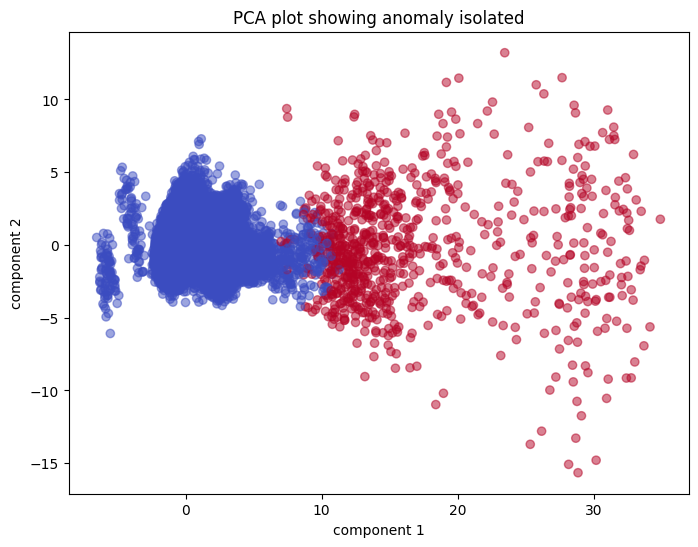

In [7]:
# on PCA plot with anomalies highlighted
plt.figure(figsize=(8, 6))
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=binary_labels, cmap="coolwarm", alpha=0.5)
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.title("PCA plot showing anomaly isolated")
plt.show()

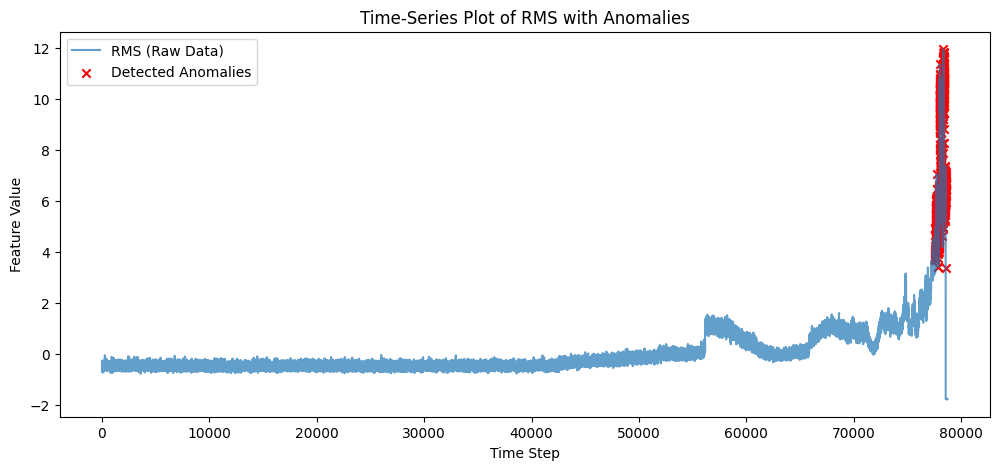

In [8]:
# highlight detected anomalies in RMS plot. 
feature_to_plot = 'RMS' 

plt.figure(figsize=(12, 5))
plt.plot(features[feature_to_plot], label=f"{feature_to_plot} (Raw Data)", alpha=0.7)

anomaly_indices = np.where(binary_labels == 1)[0]
plt.scatter(anomaly_indices, features.iloc[anomaly_indices][feature_to_plot], 
            color='red', label="Detected Anomalies", marker='x')

plt.xlabel("Time Step")
plt.ylabel("Feature Value")
plt.title(f"Time-Series Plot of {feature_to_plot} with Anomalies")
plt.legend()
plt.show()

In [9]:

# normalize anomaly scores to a probability scale 0 and 1
anomaly_probs = (anomaly_scores - np.min(anomaly_scores)) / (np.max(anomaly_scores) - np.min(anomaly_scores))

output_csv_path = "NASA_labeled.csv"
results = pd.DataFrame(features)
results["AnomalyLabel"] = binary_labels
results.to_csv(output_csv_path, index=False)
print(f"labeled data: {output_csv_path}")


labeled data: NASA_labeled.csv
